**How well do jobs and skills pay for Data Analysts?**



Methodology
   1. Evaluate median salaryfor the top 6 data jobs
   2. Find the median salary per skill for Data Analyst
   3. Visualize for highest paying skills andmost demanded skills

In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Load_Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Date_CleanUp
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\user\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\user\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Tue Jun 10 20:06:45 2025).


In [4]:
df_US = df[df['job_country']=='United States'].dropna(subset=['salary_year_avg'])

df_UK = df[df['job_country']=='United Kingdom'].dropna(subset=['salary_year_avg'])

In [20]:
job_titles_us = df_US['job_title_short'].value_counts().index[:6].tolist()

job_titles_uk =df_UK['job_title_short'].value_counts().index[:6].tolist()

In [21]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles_us)]
df_UK_top6 = df_UK[df_UK['job_title_short'].isin(job_titles_uk)]

In [22]:
job_order_us = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

In [23]:
job_order_uk = df_UK_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

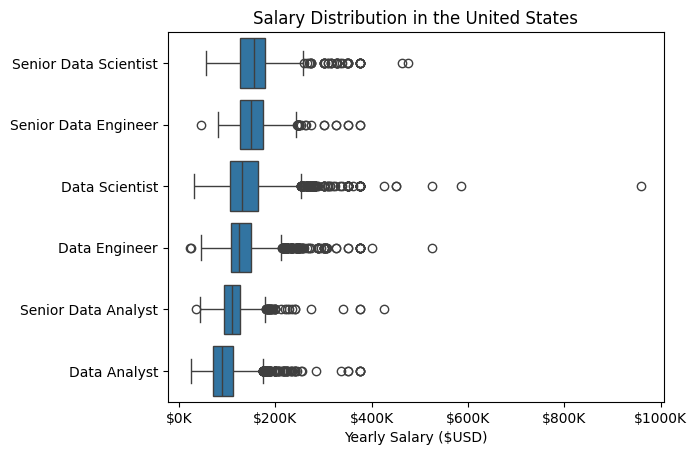

In [24]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order_us)


plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
tick_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(tick_x)

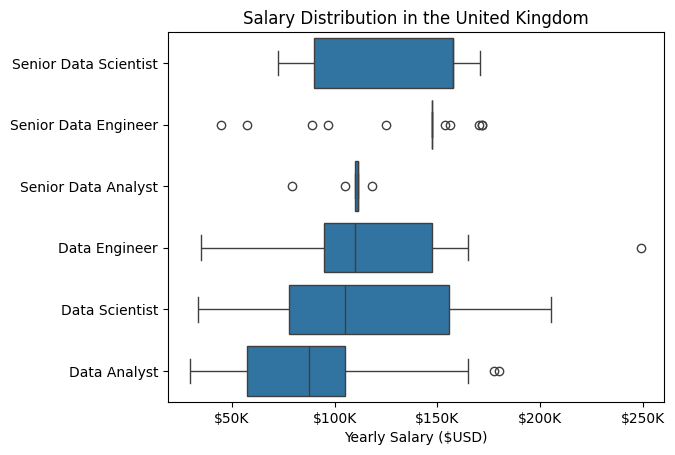

In [43]:
sns.boxplot(data=df_UK_top6, x='salary_year_avg', y='job_title_short', order=job_order_uk)


plt.title('Salary Distribution in the United Kingdom')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
tick_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(tick_x)

In [26]:
df_US = df[df['job_country']=='United States'].dropna(subset=['salary_year_avg'])

df_UK = df[df['job_country']=='United Kingdom'].dropna(subset=['salary_year_avg'])

In [28]:
df_DA_US = df_US[df_US['job_title_short']=='Data Analyst']

In [29]:
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


In [33]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

df_DA_UK = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United Kingdom')].copy()

df_DA_UK = df_DA_UK.dropna(subset='salary_year_avg')



In [34]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_UK = df_DA_UK.explode('job_skills')

In [45]:
df_DA_US_TopPay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('median', ascending=False)

df_DA_UK_TopPay = df_DA_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('median', ascending=False)

df_DA_US_TopPay = df_DA_US_TopPay.head(10)
df_DA_UK_TopPay = df_DA_UK_TopPay.head(10)

In [39]:
df_DA_UK_skills = df_DA_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('count', ascending=False)

df_DA_US_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('count', ascending=False)

In [41]:
df_DA_UK_skills = df_DA_UK_skills.head(10).sort_values(by='median', ascending=False)


df_DA_UK_skills

,count,median
job_skills,,
tableau,13,100500.0
sql,33,98500.0
looker,6,96012.5
power bi,7,89100.0
python,25,89100.0
sas,8,80007.0
r,9,77017.5
excel,29,75550.0
go,9,71000.0


In [42]:
df_DA_US_skills = df_DA_US_skills.head(10).sort_values(by='median', ascending=False)


df_DA_US_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


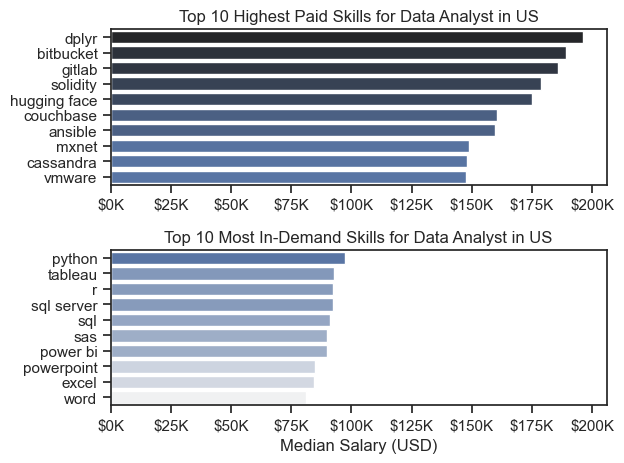

In [51]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')

#Top Highest Paid Skills for Data Analyst
sns.barplot(data=df_DA_US_TopPay, x='median', y=df_DA_US_TopPay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst in US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
#[::-1]

#Top 10 Most IN-Demand Skills for Data Analyst
sns.barplot(data=df_DA_US_skills, x='median', y=df_DA_US_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst in US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()

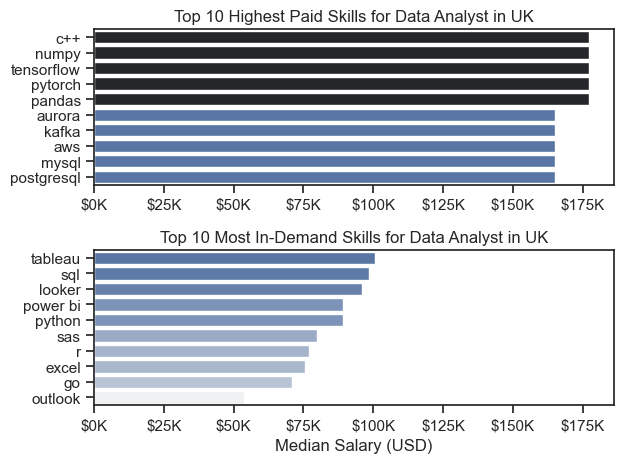

In [52]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')

#Top Highest Paid Skills for Data Analyst
sns.barplot(data=df_DA_UK_TopPay, x='median', y=df_DA_UK_TopPay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst in UK')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
#[::-1]

#Top 10 Most IN-Demand Skills for Data Analyst
sns.barplot(data=df_DA_UK_skills, x='median', y=df_DA_UK_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst in UK')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()